In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dirty_cafe_sales.csv')

data.isna().sum()
null_quantity_rows = data[data['Payment Method'].isna()]
print(null_quantity_rows)

     Transaction ID      Item Quantity Price Per Unit Total Spent  \
8       TXN_4717867       NaN        5            3.0        15.0   
9       TXN_2064365  Sandwich        5            4.0        20.0   
13      TXN_9437049    Cookie        5            1.0         5.0   
14      TXN_8915701     ERROR        2            1.5         3.0   
16      TXN_3765707  Sandwich        1            4.0         4.0   
...             ...       ...      ...            ...         ...   
9978    TXN_4302199       Tea        3            1.5         4.5   
9982    TXN_8567525    Cookie        2            1.0         2.0   
9985    TXN_3297457      Cake        2            3.0         6.0   
9994    TXN_7851634   UNKNOWN        4            4.0        16.0   
9995    TXN_7672686    Coffee        2            2.0         4.0   

     Payment Method  Location Transaction Date  
8               NaN  Takeaway       2023-07-28  
9               NaN  In-store       2023-12-31  
13              NaN  Tak

### Data Cleaning - Replace ERROR and UNKNOWN with NaN values


In [3]:
# Replace ERROR and UNKNOWN values with NaN in all columns
data = data.replace(['ERROR', 'UNKNOWN'], np.nan)

# Count remaining null values in each column
print("\nNull values count in each column:")
print(data.isnull().sum())


Null values count in each column:
Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64


### Menalaah Data


In [4]:
data.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,NaN,3,3.0,9.0,NaN,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,NaN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9031 non-null   object
 2   Quantity          9521 non-null   object
 3   Price Per Unit    9467 non-null   object
 4   Total Spent       9498 non-null   object
 5   Payment Method    6822 non-null   object
 6   Location          6039 non-null   object
 7   Transaction Date  9540 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [6]:
print(data.dtypes)

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object


In [7]:
data.isna().sum()

Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

In [8]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

# Display duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    display(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


## EDA

### Change data types
for Price Per Unit, Total Spent and Quantity to Float

In [9]:
# Convert numeric columns to float
data['Price Per Unit'] = pd.to_numeric(data['Price Per Unit'], errors='coerce')
data['Total Spent'] = pd.to_numeric(data['Total Spent'], errors='coerce')
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

# Convert Transaction Date to datetime if not already
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

# Extract day of week and hour for time-based analysis
data['Day of Week'] = data['Transaction Date'].dt.day_name()
# data['Hour'] = data['Transaction Date'].dt.hour

### Handling Missing Value
We got so many missing value in our data, so we must clean it up.

We will drop any row if on Item is NULL

In [10]:
data = data.dropna(subset=['Item']) # Drop rows where 'Item' is NaN
# Display the first few rows after dropping NaN values
print("Dataset after dropping rows where Item is NaN:")
display(data.head(10))

Dataset after dropping rows where Item is NaN:


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day of Week
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,Friday
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,Tuesday
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19,Wednesday
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27,Thursday
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,Sunday
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,NaN,2023-03-31,Friday
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,NaN,2023-10-28,Saturday
9,TXN_2064365,Sandwich,5.0,4.0,20.0,NaN,In-store,2023-12-31,Sunday
10,TXN_2548360,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07,Tuesday
11,TXN_3051279,Sandwich,2.0,4.0,8.0,Credit Card,Takeaway,NaT,NaN


We also imputate the NaN data on Quantity column with the basic math with Total Spent divided by Price per unit.

In [11]:
mask = data['Quantity'].isna() & data['Total Spent'].notna() & data['Price Per Unit'].notna() & (data['Price Per Unit'] > 0)
data.loc[mask, 'Quantity'] = (data.loc[mask, 'Total Spent'] / data.loc[mask, 'Price Per Unit']).round()

# Display the number of remaining NaN values in Quantity
print(f"NaN values in Quantity column after filling: {data['Quantity'].isna().sum()}")

# Show a few examples of fixed rows
print("\nSample of rows where Quantity was calculated:")
display(data[mask].head())

NaN values in Quantity column after filling: 35

Sample of rows where Quantity was calculated:


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day of Week
20,TXN_3522028,Smoothie,5.0,4.0,20.0,Cash,In-store,2023-04-04,Tuesday
55,TXN_5522862,Cookie,2.0,1.0,2.0,Credit Card,Takeaway,2023-03-19,Sunday
57,TXN_2080895,Cake,1.0,3.0,3.0,Digital Wallet,In-store,2023-04-19,Wednesday
66,TXN_8501819,Juice,2.0,3.0,6.0,Cash,NaN,2023-03-30,Thursday
117,TXN_2148617,Juice,3.0,3.0,9.0,Digital Wallet,NaN,2023-01-10,Tuesday


We also imputate the NaN data on Price Per Unit column with the basic math with Total Spent divided by Quantity

In [12]:
mask2 = data['Price Per Unit'].isna() & data['Total Spent'].notna() & data['Quantity'].notna() & (data['Quantity'] > 0)
data.loc[mask2, 'Price Per Unit'] = (data.loc[mask2, 'Total Spent'] / data.loc[mask2, 'Quantity']).round(2)

# Display the number of remaining NaN values in Price Per Unit
print(f"NaN values in Price Per Unit column after filling: {data['Price Per Unit'].isna().sum()}")

# Show a few examples of fixed rows
print("\nSample of rows where Price Per Unit was calculated:")
display(data[mask2].head())

NaN values in Price Per Unit column after filling: 32

Sample of rows where Price Per Unit was calculated:


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day of Week
56,TXN_3578141,Cake,5.0,3.0,15.0,NaN,Takeaway,2023-06-27,Tuesday
68,TXN_8427104,Salad,2.0,5.0,10.0,NaN,In-store,2023-10-27,Friday
85,TXN_8035512,Tea,3.0,1.5,4.5,Cash,NaN,2023-10-29,Sunday
104,TXN_7447872,Juice,2.0,3.0,6.0,NaN,NaN,NaT,NaN
140,TXN_2484241,Cake,3.0,3.0,9.0,Digital Wallet,NaN,2023-07-19,Wednesday


We also imputate the NaN data on Total Spent column with the basic math with Price Per Unit multiply by Quantity

In [13]:
mask3 = data['Total Spent'].isna() & data['Price Per Unit'].notna() & data['Quantity'].notna()
data.loc[mask3, 'Total Spent'] = (data.loc[mask3, 'Price Per Unit'] * data.loc[mask3, 'Quantity']).round(2)

# Display the number of remaining NaN values in Total Spent
print(f"NaN values in Total Spent column after filling: {data['Total Spent'].isna().sum()}")

# Show a few examples of fixed rows
print("\nSample of rows where Total Spent was calculated:")
display(data[mask3].head())

NaN values in Total Spent column after filling: 37

Sample of rows where Total Spent was calculated:


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day of Week
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,Wednesday
25,TXN_7958992,Smoothie,3.0,4.0,12.0,NaN,NaN,2023-12-13,Wednesday
42,TXN_6650263,Tea,2.0,1.5,3.0,NaN,Takeaway,2023-01-10,Tuesday
94,TXN_6289610,Juice,3.0,3.0,9.0,Cash,Takeaway,2023-08-07,Monday
143,TXN_8495063,Juice,1.0,3.0,3.0,Cash,NaN,2023-05-31,Wednesday


Check the rows if maybe rows got Two or more NaN so it'll not be cleaning.

In [14]:
# Check rows where Quantity, Price Per Unit, or Total Spent are NaN
nan_rows = data[data[['Quantity', 'Price Per Unit', 'Total Spent']].isna().any(axis=1)]

# Display the rows with NaN values
print("Rows with NaN in Quantity, Price Per Unit, or Total Spent:")
display(nan_rows)

Rows with NaN in Quantity, Price Per Unit, or Total Spent:


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day of Week
65,TXN_4987129,Sandwich,3.0,NaN,NaN,NaN,In-store,2023-10-20,Friday
236,TXN_8562645,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18,Thursday
278,TXN_3229409,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15,Saturday
629,TXN_9289174,Cake,NaN,NaN,12.0,Digital Wallet,In-store,2023-12-30,Saturday
641,TXN_2962976,Juice,NaN,3.0,NaN,NaN,NaN,2023-03-17,Friday
738,TXN_8696094,Sandwich,NaN,4.0,NaN,NaN,Takeaway,2023-05-14,Sunday
912,TXN_1575608,Sandwich,NaN,NaN,20.0,NaN,Takeaway,2023-01-05,Thursday
1008,TXN_7225428,Tea,NaN,NaN,3.0,Credit Card,Takeaway,2023-03-07,Tuesday
1436,TXN_7590801,Tea,NaN,NaN,6.0,Cash,Takeaway,NaT,NaN
1482,TXN_3593060,Smoothie,NaN,NaN,16.0,Cash,NaN,2023-03-05,Sunday


We Drop the rows if the rows got Two or more NaN in Quantity, Price per unit, and Total spent

In [15]:
# Count NaN values in the three numeric columns for each row
nan_count = data[['Quantity', 'Price Per Unit', 'Total Spent']].isna().sum(axis=1)

# Identify rows with 2 or more NaN values in these columns
rows_to_drop = nan_count >= 2

# Drop these rows
data_cleaned = data[~rows_to_drop]

# Display the result
print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")
print(f"Number of rows dropped: {sum(rows_to_drop)}")


# Update the main dataframe
data = data_cleaned

Original data shape: (9031, 9)
Cleaned data shape: (8979, 9)
Number of rows dropped: 52


We check again the data information

In [16]:
data.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      2860
Location            3565
Transaction Date     415
Day of Week          415
dtype: int64

Since the 'Payment Method' and 'Location' columns contain NULL values and are not considered essential for data processing, they will be marked as NULL or excluded from further analysis.

We Will removing row that Transaction Date contain NULL values.

In [ ]:
# Drop rows where Transaction Date is null
data = data.dropna(subset=['Transaction Date'])

# Display the count after dropping
print(f"Number of rows after dropping rows with null Transaction Date: {len(data)}")

# print the first few rows of the cleaned data
data.info()

Number of rows after dropping rows with null Transaction Date: 8564
<class 'pandas.core.frame.DataFrame'>
Index: 8564 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    8564 non-null   object        
 1   Item              8564 non-null   object        
 2   Quantity          8564 non-null   float64       
 3   Price Per Unit    8564 non-null   float64       
 4   Total Spent       8564 non-null   float64       
 5   Payment Method    5851 non-null   object        
 6   Location          5157 non-null   object        
 7   Transaction Date  8564 non-null   datetime64[ns]
 8   Day of Week       8564 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 669.1+ KB


## Visualization

First we need look the table

In [18]:
data.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day of Week
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,Friday
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,Tuesday
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,Wednesday
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27,Thursday
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,Sunday
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,NaN,2023-03-31,Friday
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,NaN,2023-10-28,Saturday
9,TXN_2064365,Sandwich,5.0,4.0,20.0,NaN,In-store,2023-12-31,Sunday
10,TXN_2548360,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07,Tuesday
12,TXN_7619095,Sandwich,2.0,4.0,8.0,Cash,In-store,2023-05-03,Wednesday


We Checked the Statistik Deskriptif

In [19]:
data.describe()

,Quantity,Price Per Unit,Total Spent,Transaction Date
count,8564.000000,8564.000000,8564.000000,8564
mean,3.025222,2.952826,8.945061,2023-07-02 06:00:30.266230784
min,1.000000,1.000000,1.000000,2023-01-01 00:00:00
25%,2.000000,2.000000,4.000000,2023-04-01 00:00:00
50%,3.000000,3.000000,8.000000,2023-07-02 00:00:00
75%,4.000000,4.000000,12.000000,2023-10-03 00:00:00
max,5.000000,5.000000,25.000000,2023-12-31 00:00:00
std,1.423127,1.278280,6.016525,NaN


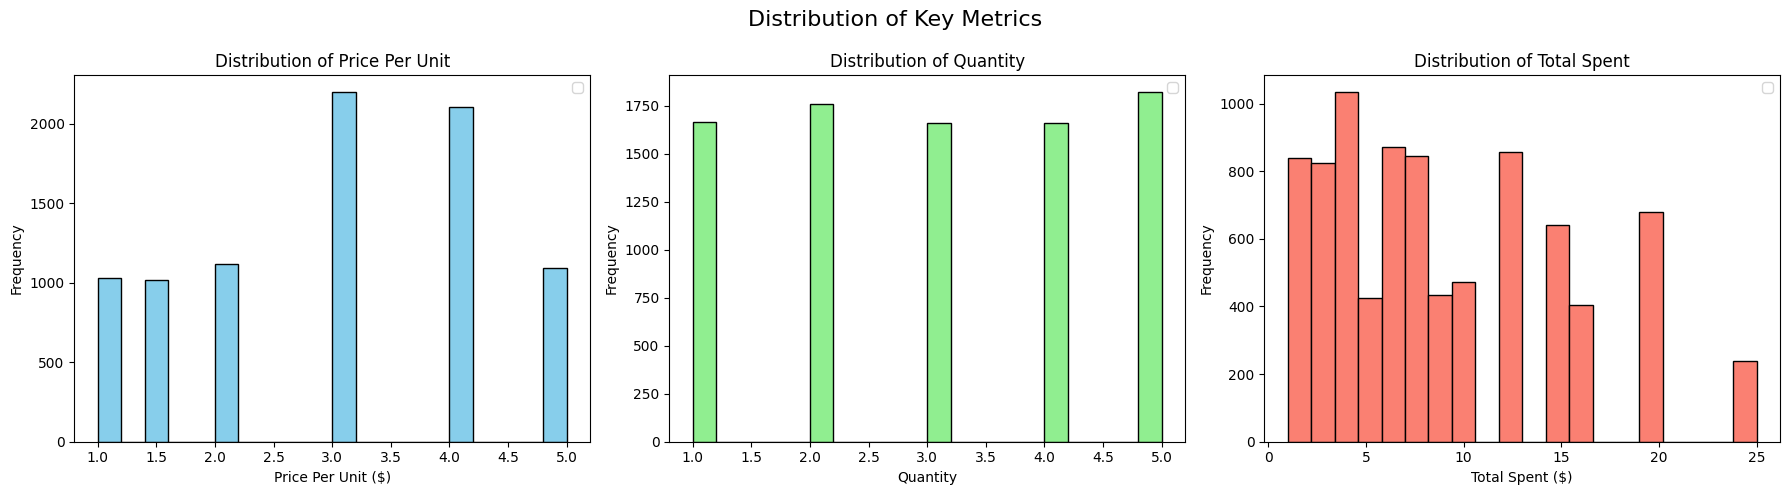

INSIGHTS FROM DISTRIBUTIONS:
1. Price Per Unit: Most items are priced in the $2.00-$4.00 range, with a right-skewed distribution suggesting premium items influence overall pricing strategy.
2. Quantity: The majority of transactions involve 5.0 to 4 items, indicating customers typically purchase small quantities per transaction.
3. Total Spent: The average customer spends $8.95, but the distribution is right-skewed, suggesting opportunity for increasing average transaction value through upselling or bundling.


In [20]:
# Distribution of numeric variables with improved formatting and insights
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Key Metrics', fontsize=16)

# Price Per Unit distribution
axes[0].hist(data['Price Per Unit'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Price Per Unit')
axes[0].set_xlabel('Price Per Unit ($)')
axes[0].set_ylabel('Frequency')
# axes[0].axvline(data['Price Per Unit'].median(), color='red', linestyle='--', label=f'Median: ${data["Price Per Unit"].median():.2f}')
# axes[0].axvline(data['Price Per Unit'].mean(), color='green', linestyle='-.', label=f'Mean: ${data["Price Per Unit"].mean():.2f}')
axes[0].legend()

# Quantity distribution
axes[1].hist(data['Quantity'].dropna(), bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution of Quantity')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('Frequency')
# axes[1].axvline(data['Quantity'].median(), color='red', linestyle='--', label=f'Median: {data["Quantity"].median():.0f}')
# axes[1].axvline(data['Quantity'].mean(), color='green', linestyle='-.', label=f'Mean: {data["Quantity"].mean():.1f}')
axes[1].legend()

# Total Spent distribution
axes[2].hist(data['Total Spent'].dropna(), bins=20, color='salmon', edgecolor='black')
axes[2].set_title('Distribution of Total Spent')
axes[2].set_xlabel('Total Spent ($)')
axes[2].set_ylabel('Frequency')
# axes[2].axvline(data['Total Spent'].median(), color='red', linestyle='--', label=f'Median: ${data["Total Spent"].median():.2f}')
# axes[2].axvline(data['Total Spent'].mean(), color='green', linestyle='-.', label=f'Mean: ${data["Total Spent"].mean():.2f}')
axes[2].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# Print insights
print("INSIGHTS FROM DISTRIBUTIONS:")
print(f"1. Price Per Unit: Most items are priced in the ${data['Price Per Unit'].quantile(0.25):.2f}-${data['Price Per Unit'].quantile(0.75):.2f} range, " +
      f"with a right-skewed distribution suggesting premium items influence overall pricing strategy.")
print(f"2. Quantity: The majority of transactions involve {data['Quantity'].mode()[0]} to {data['Quantity'].quantile(0.75):.0f} items, " +
      f"indicating customers typically purchase small quantities per transaction.")
print(f"3. Total Spent: The average customer spends ${data['Total Spent'].mean():.2f}, but the distribution is right-skewed, " +
      f"suggesting opportunity for increasing average transaction value through upselling or bundling.")

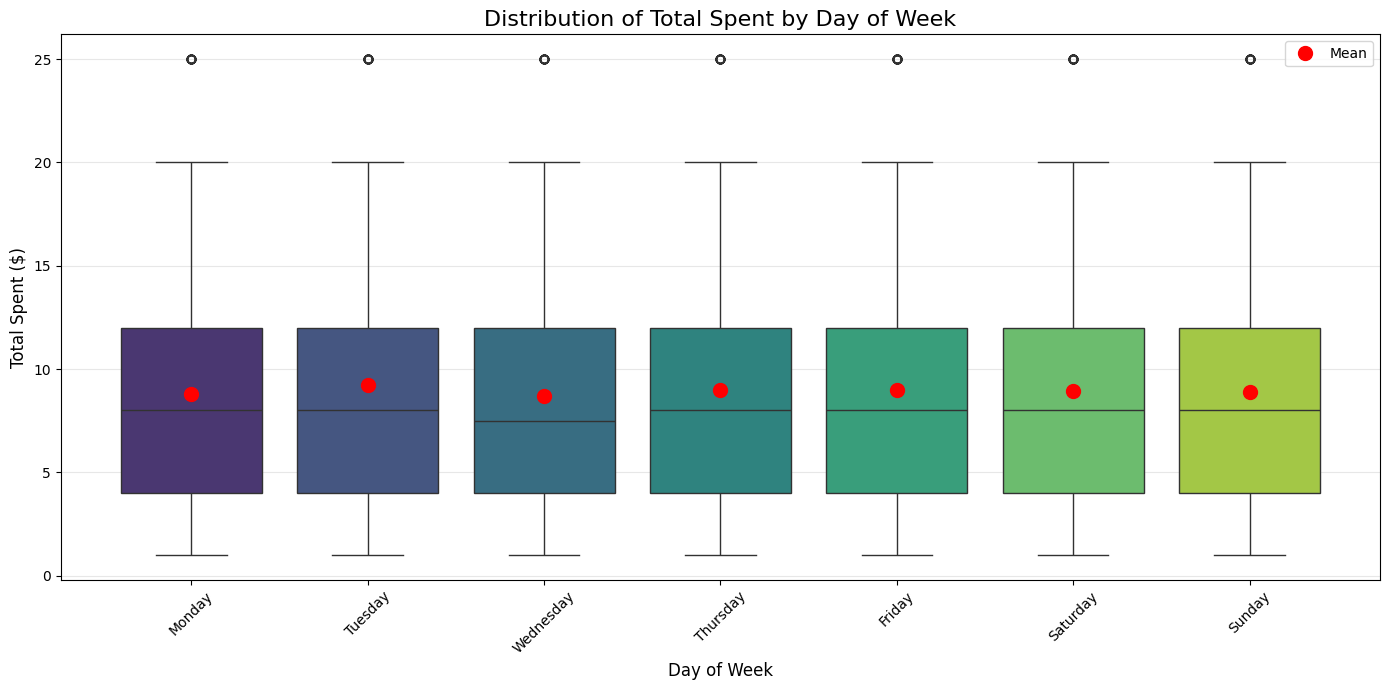

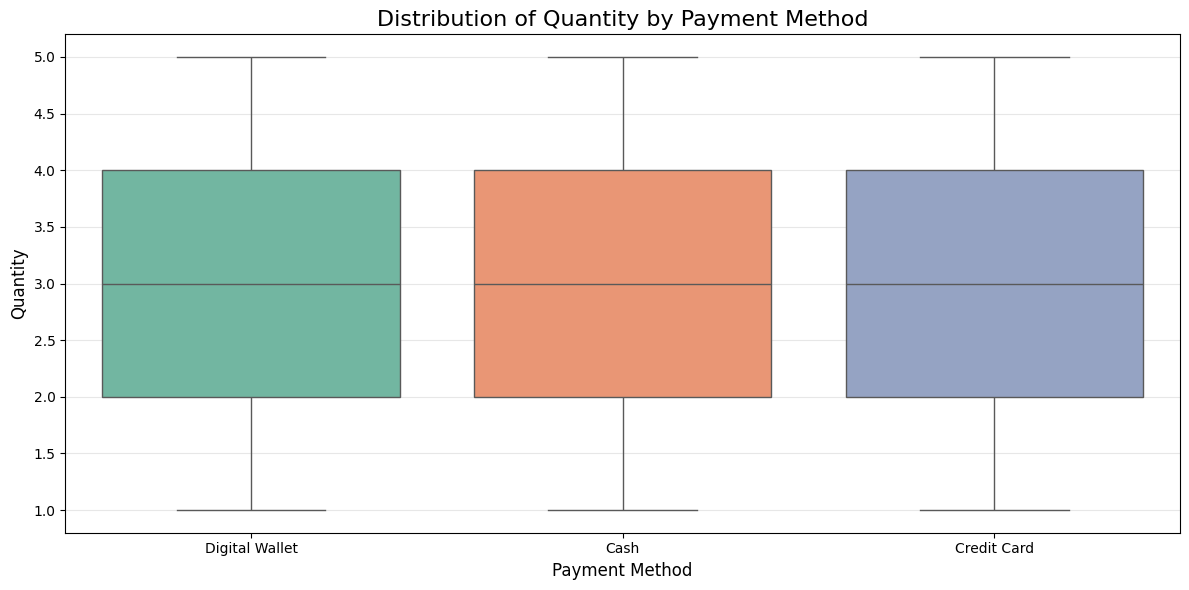

INSIGHTS FROM BOXPLOTS:
1. Day of Week Analysis: Tuesday shows the highest average spending ($9.25), while Wednesday has the lowest ($8.71). This suggests targeted promotions on Wednesday could help boost sales on slower days.
2. Payment Method Analysis: Customers using Cash tend to purchase higher quantities (3.0 items on average) compared to other payment methods. This could indicate different customer segments or purchasing behaviors based on payment preference.


In [21]:
# Sort days of week in chronological order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Box plots for Total Spent by Day of Week with improved styling
plt.figure(figsize=(14, 7))
sns.boxplot(x='Day of Week', y='Total Spent', data=data, order=day_order, palette='viridis')
plt.title('Distribution of Total Spent by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Spent ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add mean markers to make them stand out
means = data.groupby('Day of Week')['Total Spent'].mean()
ordered_means = [means[day] if day in means else 0 for day in day_order]
plt.plot(range(len(day_order)), ordered_means, 'o', color='red', markersize=10, label='Mean')
plt.legend()

plt.tight_layout()
plt.show()

# Create a new boxplot for Quantity by Payment Method
plt.figure(figsize=(12, 6))
payment_order = data['Payment Method'].dropna().value_counts().index.tolist()
sns.boxplot(x='Payment Method', y='Quantity', data=data, order=payment_order, palette='Set2')
plt.title('Distribution of Quantity by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print insights
print("INSIGHTS FROM BOXPLOTS:")
day_means = data.groupby('Day of Week')['Total Spent'].mean().reindex(day_order)
busiest_day = day_means.idxmax()
slowest_day = day_means.idxmin()
print(f"1. Day of Week Analysis: {busiest_day} shows the highest average spending (${day_means[busiest_day]:.2f}), " +
      f"while {slowest_day} has the lowest (${day_means[slowest_day]:.2f}). This suggests targeted promotions " +
      f"on {slowest_day} could help boost sales on slower days.")

payment_insights = data.groupby('Payment Method')['Quantity'].mean().sort_values(ascending=False)
print(f"2. Payment Method Analysis: Customers using {payment_insights.index[0]} tend to purchase higher quantities " +
      f"({payment_insights.iloc[0]:.1f} items on average) compared to other payment methods. " + 
      f"This could indicate different customer segments or purchasing behaviors based on payment preference.")

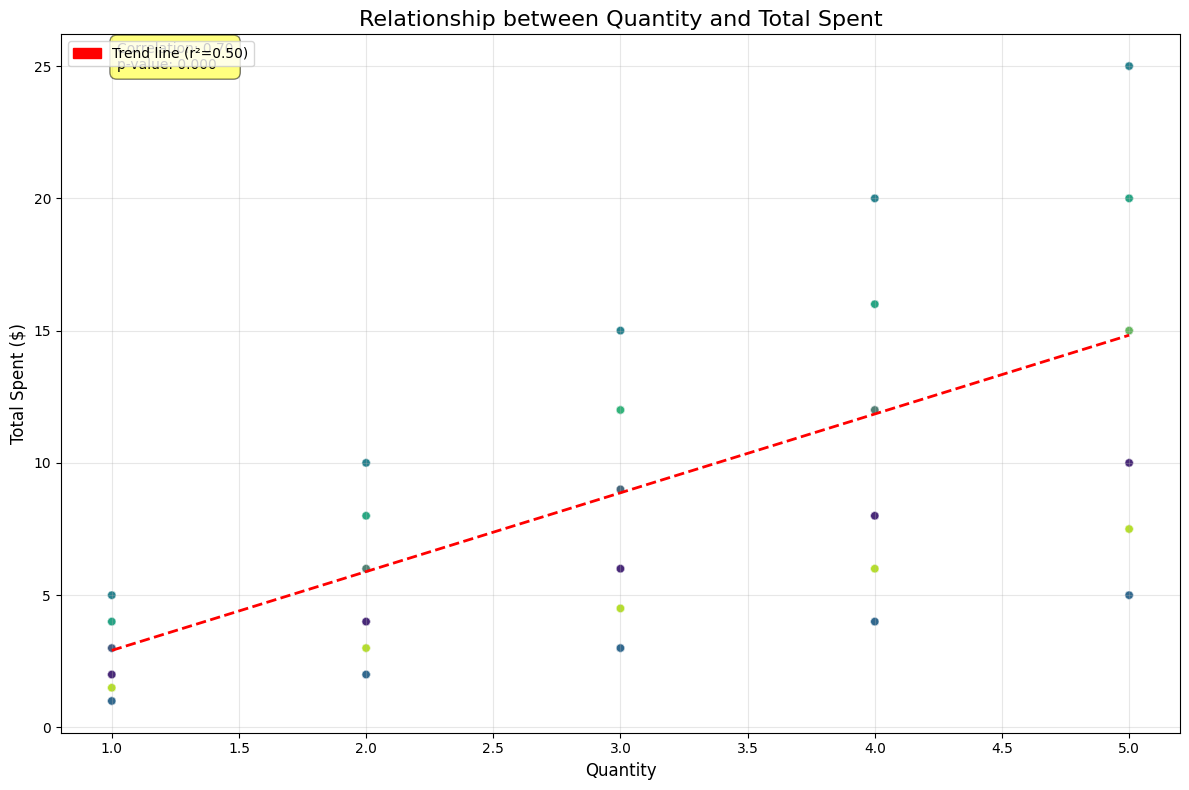

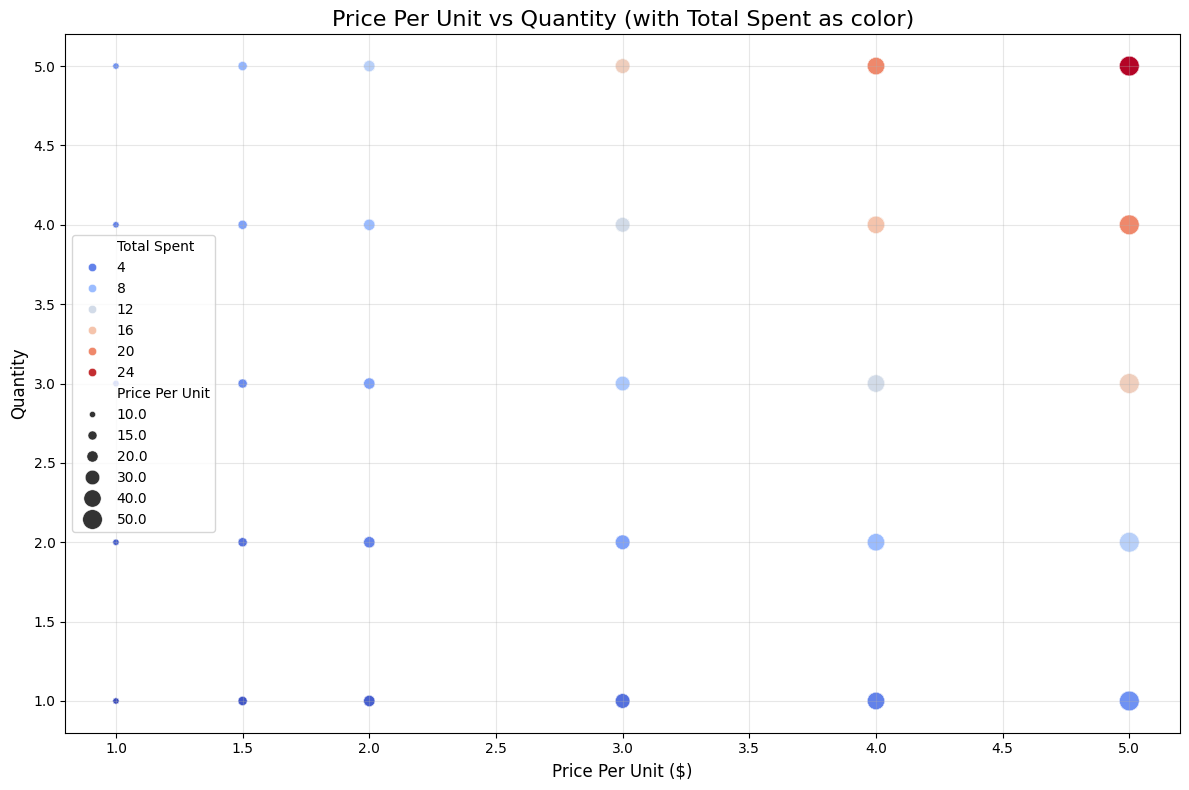

INSIGHTS FROM SCATTER PLOTS:
1. Quantity vs Total Spent: The strong positive correlation (r=0.70) indicates that total spending increases predictably with quantity. However, the spread of points suggests that some items contribute disproportionately to total revenue, which could inform inventory decisions.
2. Price vs Quantity Relationship: There's a 0.01 positive correlation between price and quantity. Surprisingly, higher-priced items often sell in larger quantities, suggesting quality perception or value-based purchasing.
3. Premium High-Volume Items: Salad stand out as premium items that sell in high volumes, suggesting strong customer loyalty or perceived value.


In [22]:
import matplotlib.patches as mpatches

# Scatter plot of Quantity vs Total Spent with trend line and insights
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Quantity', y='Total Spent', data=data, alpha=0.5, hue='Item', palette='viridis')

# Add regression line
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Quantity'].dropna(), data['Total Spent'].dropna())
x = np.array([data['Quantity'].min(), data['Quantity'].max()])
y = intercept + slope * x
plt.plot(x, y, 'r--', linewidth=2, label=f'Trend line (r²={r_value**2:.2f})')

plt.title('Relationship between Quantity and Total Spent', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Total Spent ($)', fontsize=12)
plt.grid(alpha=0.3)

# Create custom legend patch for the trend line
red_patch = mpatches.Patch(color='red', label=f'Trend line (r²={r_value**2:.2f})')
plt.legend(handles=[red_patch], loc='upper left')

# Annotate the correlation coefficient and p-value
correlation = data['Quantity'].corr(data['Total Spent'])
plt.annotate(f"Correlation: {correlation:.2f}\np-value: {p_value:.3f}", 
             xy=(0.05, 0.95), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5))

plt.tight_layout()
plt.show()

# Create a second scatter plot with more features
plt.figure(figsize=(12, 8))
# Use Price Per Unit as the feature for point size
sizes = data['Price Per Unit'] * 10  # Scale up for visibility
sns.scatterplot(x='Price Per Unit', y='Quantity', size=sizes, sizes=(20, 200),
                hue='Total Spent', palette='coolwarm', data=data)

plt.title('Price Per Unit vs Quantity (with Total Spent as color)', fontsize=16)
plt.xlabel('Price Per Unit ($)', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print insights
print("INSIGHTS FROM SCATTER PLOTS:")
print(f"1. Quantity vs Total Spent: The strong positive correlation (r={correlation:.2f}) indicates that " +
      f"total spending increases predictably with quantity. However, the spread of points suggests " +
      f"that some items contribute disproportionately to total revenue, which could inform inventory decisions.")

price_qty_corr = data['Price Per Unit'].corr(data['Quantity'])
print(f"2. Price vs Quantity Relationship: There's a {abs(price_qty_corr):.2f} {'positive' if price_qty_corr > 0 else 'negative'} " +
      f"correlation between price and quantity. {'This suggests price sensitivity - as prices increase, customers buy fewer items.' if price_qty_corr < 0 else 'Surprisingly, higher-priced items often sell in larger quantities, suggesting quality perception or value-based purchasing.'}")

# Identify any outlier items with unusual price-quantity relationships
high_price_high_qty = data[(data['Price Per Unit'] > data['Price Per Unit'].quantile(0.75)) & 
                           (data['Quantity'] > data['Quantity'].quantile(0.75))]
if not high_price_high_qty.empty:
    popular_premium = high_price_high_qty['Item'].value_counts().head(3).index.tolist()
    print(f"3. Premium High-Volume Items: {', '.join(popular_premium)} stand out as premium items that " +
          f"sell in high volumes, suggesting strong customer loyalty or perceived value.")

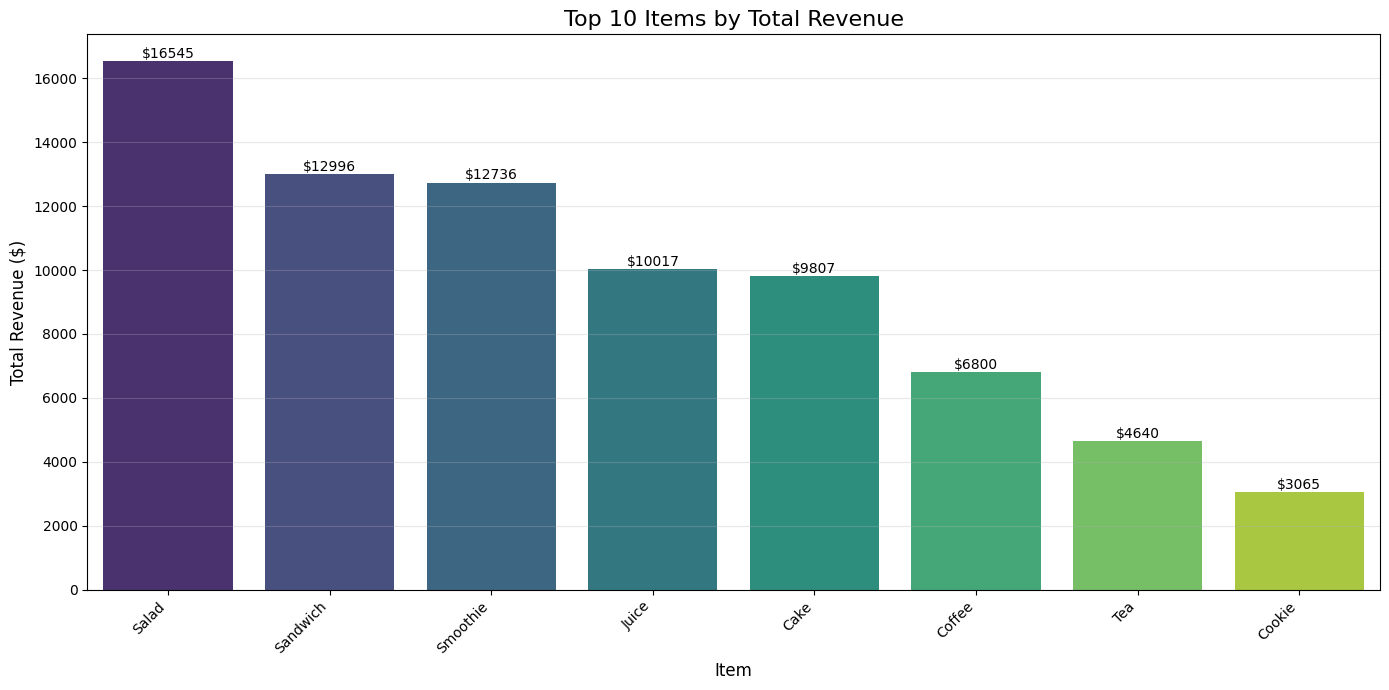

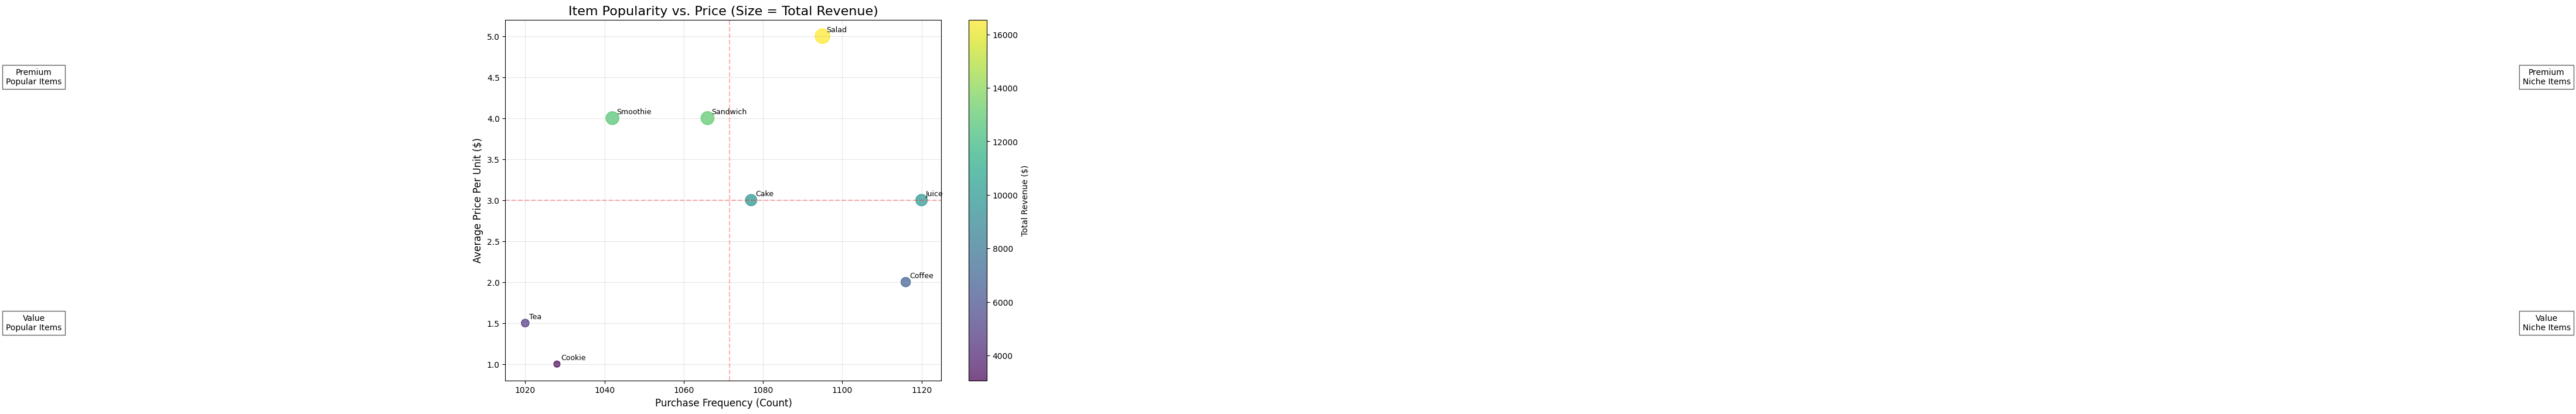

INSIGHTS FROM ITEM ANALYSIS:
1. Revenue Leaders: Salad is the top revenue generator at $16545.00, accounting for 21.6% of total café sales. The top 3 items (Salad, Sandwich, Smoothie) collectively represent 55.2% of total revenue.
2. Premium Popular Items: Salad are high-performing items that combine above-average price points with strong customer demand. These items should be prominently featured in marketing materials.
3. Price Optimization Opportunities: Coffee are frequently purchased but priced below average. Consider strategic price increases on these popular items to improve margins without significantly impacting demand.


In [23]:
# Top items by total revenue
top_items_revenue = data.groupby('Item')['Total Spent'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=top_items_revenue.index, y=top_items_revenue.values, palette='viridis')
plt.title('Top 10 Items by Total Revenue', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'${height:.0f}', ha='center', va='bottom', rotation=0)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Item popularity vs. profitability matrix
item_analysis = data.groupby('Item').agg({
    'Transaction ID': 'count',  # Frequency of purchases
    'Price Per Unit': 'mean',   # Average price
    'Total Spent': 'sum'        # Total revenue
}).reset_index()

item_analysis = item_analysis.rename(columns={'Transaction ID': 'Purchase_Frequency'})
item_analysis = item_analysis.sort_values('Total Spent', ascending=False).head(15)  # Focus on top 15 items

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    item_analysis['Purchase_Frequency'], 
    item_analysis['Price Per Unit'],
    s=item_analysis['Total Spent']/50,  # Size based on total revenue
    c=item_analysis['Total Spent'],     # Color based on total revenue
    cmap='viridis',
    alpha=0.7
)

# Add item labels
for i, row in item_analysis.iterrows():
    plt.annotate(row['Item'], 
                 (row['Purchase_Frequency'], row['Price Per Unit']),
                 fontsize=9,
                 xytext=(5, 5),
                 textcoords='offset points')

plt.colorbar(scatter, label='Total Revenue ($)')
plt.title('Item Popularity vs. Price (Size = Total Revenue)', fontsize=16)
plt.xlabel('Purchase Frequency (Count)', fontsize=12)
plt.ylabel('Average Price Per Unit ($)', fontsize=12)
plt.grid(alpha=0.3)

# Add quadrant dividers at median values
x_median = item_analysis['Purchase_Frequency'].median()
y_median = item_analysis['Price Per Unit'].median()
plt.axvline(x=x_median, color='red', linestyle='--', alpha=0.3)
plt.axhline(y=y_median, color='red', linestyle='--', alpha=0.3)

# Add quadrant labels
plt.text(item_analysis['Purchase_Frequency'].max()*0.8, item_analysis['Price Per Unit'].max()*0.9, 
         "Premium\nPopular Items", ha='center', va='center', 
         bbox=dict(facecolor='white', alpha=0.6))
plt.text(item_analysis['Purchase_Frequency'].min()*1.5, item_analysis['Price Per Unit'].max()*0.9, 
         "Premium\nNiche Items", ha='center', va='center', 
         bbox=dict(facecolor='white', alpha=0.6))
plt.text(item_analysis['Purchase_Frequency'].max()*0.8, item_analysis['Price Per Unit'].min()*1.5, 
         "Value\nPopular Items", ha='center', va='center', 
         bbox=dict(facecolor='white', alpha=0.6))
plt.text(item_analysis['Purchase_Frequency'].min()*1.5, item_analysis['Price Per Unit'].min()*1.5, 
         "Value\nNiche Items", ha='center', va='center', 
         bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()

# Print insights
print("INSIGHTS FROM ITEM ANALYSIS:")
top_seller = top_items_revenue.index[0]
top_revenue = top_items_revenue.iloc[0]
print(f"1. Revenue Leaders: {top_seller} is the top revenue generator at ${top_revenue:.2f}, " +
      f"accounting for {top_revenue/data['Total Spent'].sum()*100:.1f}% of total café sales. " +
      f"The top 3 items ({', '.join(top_items_revenue.index[:3])}) collectively represent " +
      f"{top_items_revenue.iloc[:3].sum()/data['Total Spent'].sum()*100:.1f}% of total revenue.")

# Find premium popular items (high frequency, high price)
premium_popular = item_analysis[
    (item_analysis['Purchase_Frequency'] > item_analysis['Purchase_Frequency'].median()) & 
    (item_analysis['Price Per Unit'] > item_analysis['Price Per Unit'].median())
]
if not premium_popular.empty:
    print(f"2. Premium Popular Items: {', '.join(premium_popular['Item'].tolist())} are high-performing items " +
          f"that combine above-average price points with strong customer demand. " +
          f"These items should be prominently featured in marketing materials.")

# Find potential price optimization opportunities
value_popular = item_analysis[
    (item_analysis['Purchase_Frequency'] > item_analysis['Purchase_Frequency'].median()) & 
    (item_analysis['Price Per Unit'] < item_analysis['Price Per Unit'].median())
]
if not value_popular.empty:
    print(f"3. Price Optimization Opportunities: {', '.join(value_popular['Item'].tolist())} are frequently purchased " +
          f"but priced below average. Consider strategic price increases on these popular items to improve margins " +
          f"without significantly impacting demand.")